### this is the notebook for messing around to see what i find in the datta

In [5]:
# establishing a connection

import MetaTrader5 as mt5

# 1. Define the path to the FBS EXE file

mt5_path = r"C:\Program Files\FBS MetaTrader 5\terminal64.exe"


print(f"Attempting to connect to: {mt5_path}...")

# 2. Initialize the connection
# We pass the path so Python doesn't look for the generic version
if not mt5.initialize(path=mt5_path):
    print("❌ Connection Failed")
    print("Error Code:", mt5.last_error())
else:
    print("✅ Connection Successful!")
    
    # 3. Print Account Info to prove we are talking to the broker
    account_info = mt5.account_info()
    if account_info:
        print(f"Connected to Account: {account_info.login}")
        # print(f"Connected to Account: {account_info.password}")
        print(f"Server: {account_info.server}")
        print(f"Balance: {account_info.balance} USD")
    
    # 4. Close connection
    mt5.shutdown()

Attempting to connect to: C:\Program Files\FBS MetaTrader 5\terminal64.exe...
✅ Connection Successful!
Connected to Account: 105395845
Server: FBS-Demo
Balance: 20000.0 USD


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
daily_df = pd.read_parquet('../data/EURUSD_D1.parquet')
daily_df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2020-01-02,1.12120,1.12255,1.11640,1.11720,37991,20,0
2020-01-03,1.11720,1.11792,1.11241,1.11540,40083,21,0
2020-01-06,1.11630,1.12058,1.11565,1.11955,33765,21,0
2020-01-07,1.11948,1.11978,1.11327,1.11518,36622,15,0
2020-01-08,1.11514,1.11675,1.10998,1.11039,52731,15,0
...,...,...,...,...,...,...,...
2025-12-16,1.17495,1.18040,1.17343,1.17474,60266,8,0
2025-12-17,1.17450,1.17581,1.17030,1.17399,59217,8,0
2025-12-18,1.17378,1.17629,1.17122,1.17240,59197,8,0


In [15]:
daily_df.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'], dtype='object')

In [16]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2020-01-02 to 2025-12-22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1552 non-null   float64
 1   high         1552 non-null   float64
 2   low          1552 non-null   float64
 3   close        1552 non-null   float64
 4   tick_volume  1552 non-null   uint64 
 5   spread       1552 non-null   int32  
 6   real_volume  1552 non-null   uint64 
dtypes: float64(4), int32(1), uint64(2)
memory usage: 90.9 KB


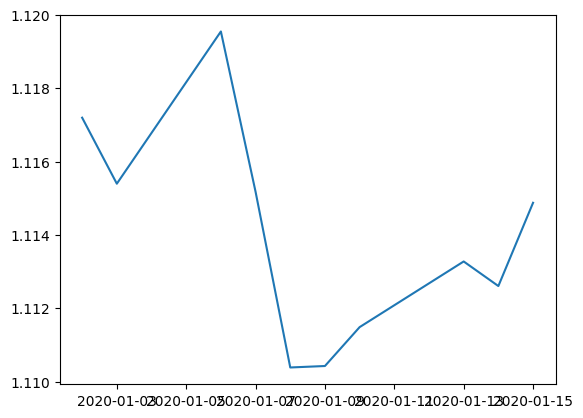

In [12]:
plt.plot(daily_df.loc['2020-01-02' : '2020-01-15']['close'])